In [9]:
%matplotlib inline
import torch
import numpy as np
import blocks
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision import transforms as tvtransforms
from torch.utils.data import Dataset, DataLoader
import torchvision.utils as vutils

# Own functions
from dataloaders import Dataset_CTCovid19August2020, Dataset_PolyU_CXR
import transforms

# Decide which device we want to run on
ngpu = 0
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)

cpu


KeyError: 0

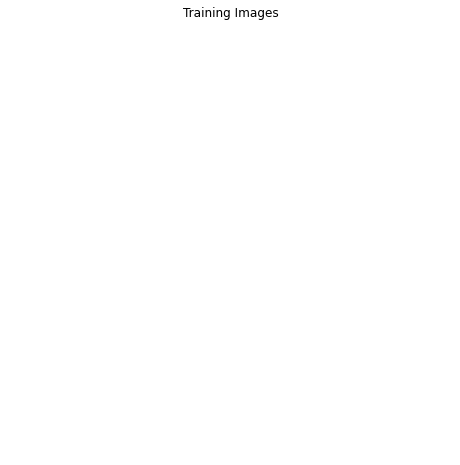

In [10]:
keys_images = ["source", "boneless", "lung"]
ds_discriminator = Dataset_CTCovid19August2020(Path("D:\data\CT-Covid-19-August2020\DRR_output\DRR_directory.csv"), Path("D:\data\CT-Covid-19-August2020\DRR_output"), 
                                 transform=tvtransforms.Compose([
                                     transforms.ToTensor(keys_images),
                                     transforms.Rescale((512,512), keys_images, "PixelSize"),
                                     transforms.RescalingNormalisation(keys_images)
                                     ]))
keys_images = ["source"]
ds_generator = Dataset_PolyU_CXR(Path("D:\data\POLYU_COVID19_CXR_CT_Cohort1"),
                                 transform=tvtransforms.Compose([
                                     transforms.ToTensor(keys_images),
                                     transforms.Rescale((512,512), keys_images, "PixelSize"),
                                     transforms.ImageComplement(keys_images),
                                     transforms.RescalingNormalisation(keys_images)
                                     ]))

dl_training = DataLoader(ds_discriminator, batch_size=4,
                        shuffle=True, num_workers=0)


In [ ]:
real_batch = next(iter(dl_training))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))